In [13]:
# use pyproject group: experiments_analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import yaml


In [26]:
# Load YAML file
with open('../../results.yaml') as file:
    data = yaml.safe_load(file)

# Process metrics per experiment call
rows = []
for experiment in data['experiments']:
    if not experiment['results']:
        continue
    for result in experiment['results']:
        metrics = result['metrics']
        kwargs = result['kwargs']
        options = {
            'samplepoints': kwargs.get('samplepoints', 0),
            **{
                f"option_{k}":v
                for k,v in kwargs.get('config', {}).items()
            }
        }
        options.update
        # Annotate metrics with experiment name and date
        row = {
            'experiment': experiment['name'],
            'date': data['date'],
            **metrics,
            **options
            }
        rows.append(row)

# Convert to DataFrame
df = pd.DataFrame(rows)
print(df.keys())


Index(['experiment', 'date', 'uJ_per_all', 'uJ_per_convolution',
       'uJ_per_input_loading', 'uJ_per_weights_loading', 'uW_per_all',
       'uW_per_convolution', 'uW_per_input_loading', 'uW_per_weights_loading',
       'us_per_all', 'us_per_convolution', 'us_per_input_loading',
       'us_per_weights_loading', 'samplepoints', 'option_read_margin_enable'],
      dtype='object')


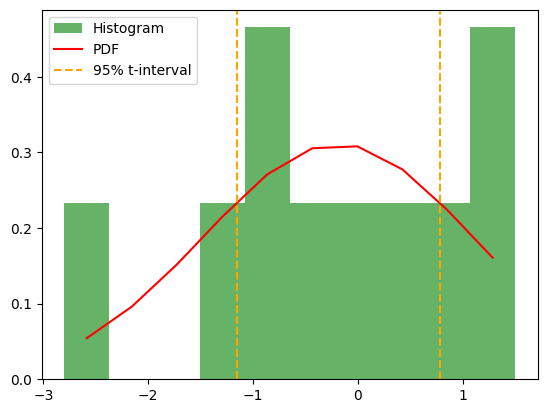

In [27]:
# Raw data and basic setup
data = np.random.randn(10)
hist, bins = np.histogram(data, bins=10, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot Histogram
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', label='Histogram')

# PDF
pdf = stats.norm.pdf(bin_centers, np.mean(data), np.std(data))
plt.plot(bin_centers, pdf, label='PDF', color='red')

# CDF
#cdf = np.cumsum(hist*np.diff(bins))
#plt.plot(bin_centers, cdf, label='CDF', color='blue')

# Student's t-interval
t_interval = stats.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=stats.sem(data))
plt.axvline(t_interval[0], color='orange', linestyle='--', label='95% t-interval')
plt.axvline(t_interval[1], color='orange', linestyle='--')

# Display
plt.legend()
plt.show()


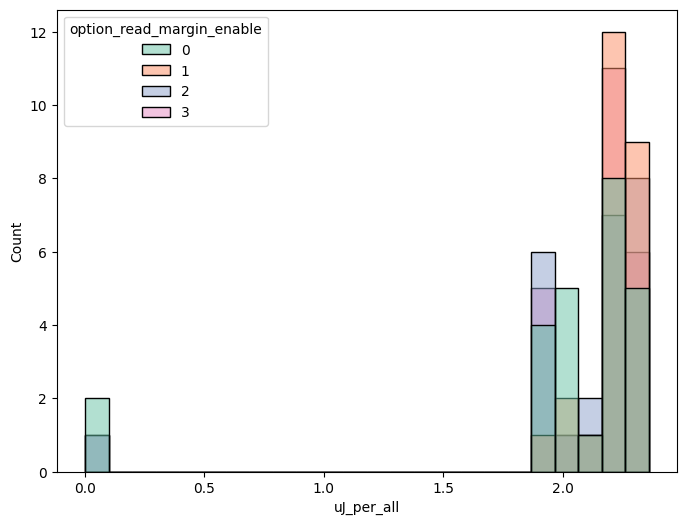

In [30]:


# Assuming 'df' is your DataFrame and the column to differentiate by is 'experiment'
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='uJ_per_all',
    hue='option_read_margin_enable',
    multiple='layer',
    palette='Set2'
    )

plt.show()
